# Prostate Cancer

The data, taken from Stamey et al.
(1989), contains the results of biopsies on 97 men of various ages
The biopsy information includes:
Gleason score (gleason): scores are assigned to the two most common tumor
patterns ranging from 2 to 10; in this data set, the range is from 6 to 9.
Prostate-specific antigen (psa): laboratory results on protein production.
Capsular penetration (cp): reach of cancer into the gland lining.
Benign prostatic hyperplasia amount (bph): size of the prostate.
The goal is to predict the tumor log volume (which measures the tumor’s size or
spread). We try to predict this variable from five covariates (age; logarithms of bph,
cp, and psa; and the Gleason score). The predicted size of the tumor has important
implications for the subsequent treatment options, which include chemotherapy,
radiation treatment, and surgical removal of the prostate.
Here the response is a
continuous measurement variable, and we are dealing with a regression tree. We
use the sum of squared residuals as the impurity (fitting) criterion

* 1.Data Pre-processing
* 2.Data is trained with various Machine Learning Model 
* 3.Decision Tree Classifier 
* 4.Underfitting and Overfitting
  * 1. Early Stopping condition
  * 2. Even Best cost_complexity ccp_alpha to overcome Underfitting and Overfitting
* 5.  SVM
* 6. Logistic Regression
* 7. Navie Bayes
* 8. KNN
* Compare all the model results and select Better Performing Model

In [352]:

import sklearn
sklearn.__version__

'0.22.1'

In [353]:
import pandas as pd
df=pd.read_csv("F:\\Prostate_Cancer.csv")

In [400]:
df.head(60)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [358]:
df.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [359]:
df.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [360]:
df.shape

(100, 10)

In [361]:
df.isnull().sum()

id                   0
diagnosis_result     0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [362]:
# frquency count of categorical variables

col_names = ['diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension']


In [363]:
for col in col_names:
    
    print(df[col].value_counts())   

M    62
B    38
Name: diagnosis_result, dtype: int64
10    11
19     9
16     8
11     8
22     7
25     6
21     6
20     6
18     6
17     6
23     5
15     5
14     5
12     5
9      4
24     3
Name: radius, dtype: int64
15    9
21    9
11    8
13    8
14    8
26    7
12    7
18    7
27    7
16    6
24    5
17    4
22    4
25    4
19    4
23    2
20    1
Name: texture, dtype: int64
83     5
87     5
86     4
97     4
94     4
78     4
96     4
120    3
59     3
104    3
88     3
60     2
72     2
74     2
95     2
85     2
90     2
132    2
130    2
128    2
100    2
103    2
124    2
110    2
122    2
151    1
121    1
55     1
54     1
52     1
172    1
137    1
144    1
62     1
135    1
133    1
129    1
116    1
115    1
65     1
102    1
73     1
114    1
75     1
76     1
77     1
113    1
79     1
80     1
81     1
125    1
84     1
108    1
107    1
126    1
Name: perimeter, dtype: int64
520     3
1076    2
578     2
559     2
535     1
       ..
1033    1
269     1
471    

In [364]:
# target variable
df['diagnosis_result'].value_counts()

M    62
B    38
Name: diagnosis_result, dtype: int64

In [365]:
X = df.drop(['diagnosis_result'], axis=1)

y =  df.drop(['radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension','id'], axis=1)

In [366]:
y

,diagnosis_result
0,M
1,B
2,M
3,M
4,M
...,...
95,M
96,B
97,B
98,B


In [367]:
y.dtypes

diagnosis_result    object
dtype: object

In [368]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [369]:

X_train.shape, X_test.shape

((70, 9), (30, 9))

In [370]:
# check data types in X_train

X_train.dtypes

id                     int64
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object

In [372]:
from sklearn.tree import DecisionTreeClassifier

In [373]:

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=42)




In [374]:
import warnings

warnings.filterwarnings('ignore')

In [375]:
# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

### Predict the Test set results with criterion gini index¶


In [399]:
y_pred_gini_test = clf_gini.predict(X_test)

In [398]:
y_pred_gini_test

array(['M', 'M', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'M'], dtype=object)

In [377]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7333


Here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy -Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [378]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B'], dtype=object)

In [379]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 1.0000


### Check for overfitting and underfitting¶


In [380]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.7333


[Text(267.84000000000003, 398.64, 'X[3] <= 87.5\ngini = 0.49\nsamples = 70\nvalue = [30, 40]'),
 Text(133.92000000000002, 326.15999999999997, 'X[6] <= 0.109\ngini = 0.257\nsamples = 33\nvalue = [28, 5]'),
 Text(66.96000000000001, 253.67999999999998, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]'),
 Text(200.88000000000002, 253.67999999999998, 'X[6] <= 0.127\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(133.92000000000002, 181.2, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(267.84000000000003, 181.2, 'X[1] <= 15.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]'),
 Text(200.88000000000002, 108.71999999999997, 'X[7] <= 0.193\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(133.92000000000002, 36.23999999999995, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 36.23999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(334.80000000000007, 108.71999999999997, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(401.76000000000005, 326.15999999999997, 'X[0] <

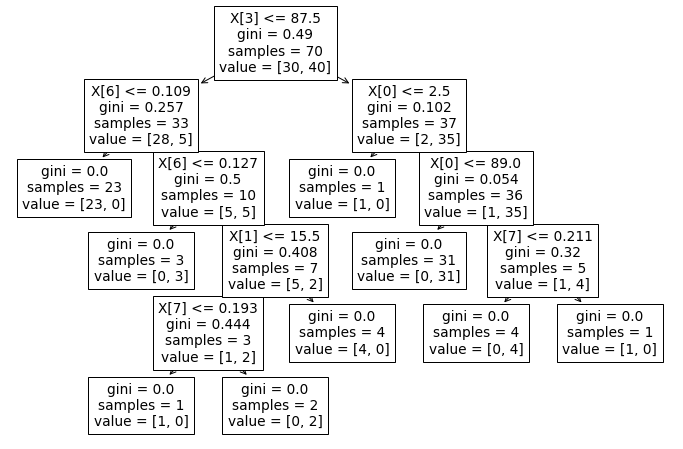

In [328]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline


plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [329]:
import graphviz 
import sklearn
from sklearn import tree

In [381]:
y_train.dtypes

diagnosis_result    object
dtype: object

In [401]:
clf_en = DecisionTreeClassifier(criterion='gini', max_depth=3,min_samples_leaf=8, random_state=42)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [402]:
y_pred_en = clf_en.predict(X_test)


In [403]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7667


In [404]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en


print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9000


In [386]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9571
Test set score: 0.7000


In [387]:
# Print the Confusion Matrix and slice it into 2 pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 5  3]
 [ 6 16]]


In [388]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           B       0.45      0.62      0.53         8
           M       0.84      0.73      0.78        22

    accuracy                           0.70        30
   macro avg       0.65      0.68      0.65        30
weighted avg       0.74      0.70      0.71        30



Decision Tree Classification Score:  0.7666666666666667


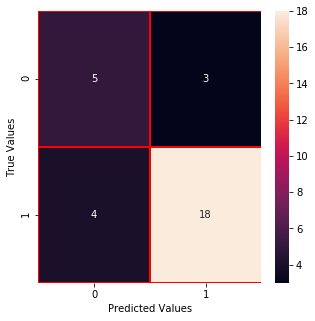

In [389]:
from sklearn.tree import DecisionTreeClassifier
method_names=[]
method_scores=[]
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train,y_train)
print("Decision Tree Classification Score: ",dec_tree.score(X_test,y_test))
method_names.append("Decision Tree")
method_scores.append(dec_tree.score(X_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Naive Bayes Classification Score: 0.8333333333333334


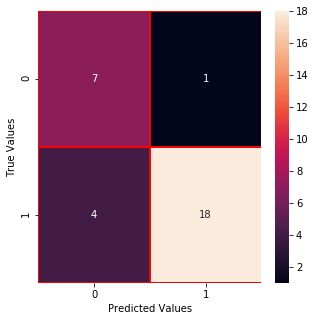

In [390]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_test,y_test)
print("Naive Bayes Classification Score: {}".format(naive_bayes.score(X_test,y_test)))
method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(X_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

SVM Classification Score is: 0.8333333333333334


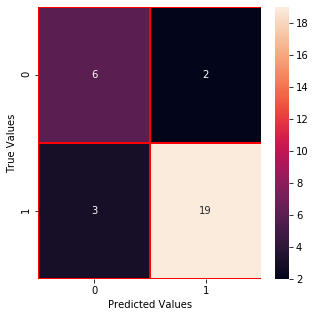

In [391]:
# SVM!
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train,y_train)
print("SVM Classification Score is: {}".format(svm.score(X_test,y_test)))
method_names.append("SVM")
method_scores.append(svm.score(X_test,y_test))

#Confusion Matrix
y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Score for Number of Neighbors = 6: 0.7333333333333333


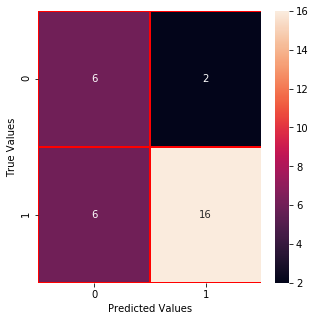

In [392]:
# Continue with; KNN Classification!
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)  # 5 is optional.
knn.fit(X_train,y_train)
print("Score for Number of Neighbors = 6: {}".format(knn.score(X_test,y_test)))
method_names.append("KNN")
method_scores.append(knn.score(X_test,y_test))

#Confusion Matrix
y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Logistic Regression Classification Test Accuracy 0.8333333333333334


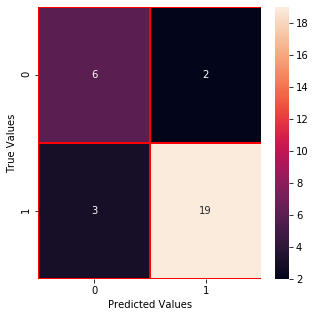

In [393]:
# Firstly, we start with Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train) #Fitting
print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(X_test,y_test)))
method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(X_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)
#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

Text(0, 0.5, 'Method Score')

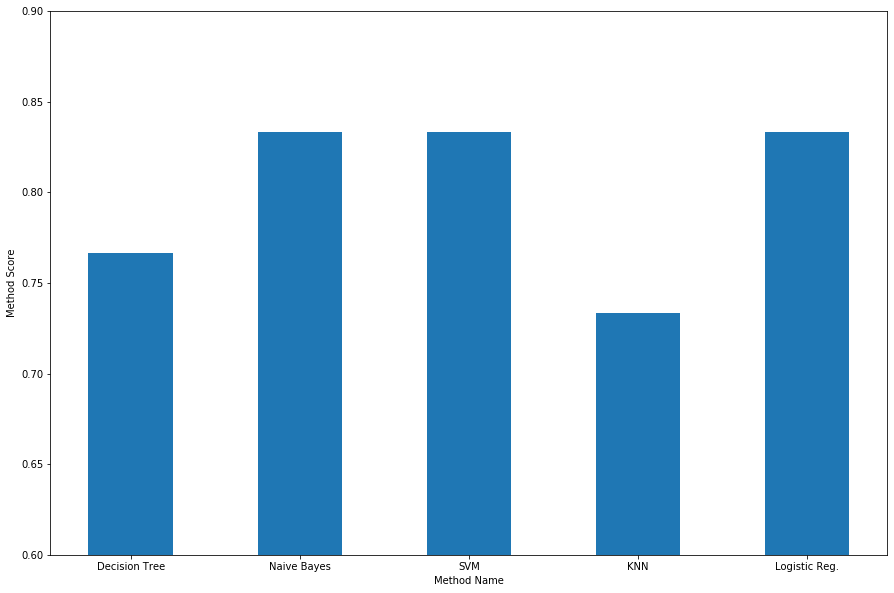

In [394]:
plt.figure(figsize=(15,10))
plt.ylim([0.60,0.90])
plt.bar(method_names,method_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')